In [32]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [33]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Inspect the measurement and station tables first.
from sqlalchemy import inspect
inspector = inspect(engine)

for table_name in inspector.get_table_names():
    print (f'{table_name}')
    for column in inspector.get_columns(table_name):
        print (f"{column['name']} : {column['type']}")
    print('\n')

measurement
id : INTEGER
station : TEXT
date : TEXT
prcp : FLOAT
tobs : FLOAT


station
id : INTEGER
station : TEXT
name : TEXT
latitude : FLOAT
longitude : FLOAT
elevation : FLOAT




## D1: Determine the Summary Statistics for June

In [35]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.like('%-06-%'))

for t in temps:
    print(t)

('2010-06-01', 78.0)
('2010-06-02', 76.0)
('2010-06-03', 78.0)
('2010-06-04', 76.0)
('2010-06-05', 77.0)
('2010-06-06', 78.0)
('2010-06-07', 77.0)
('2010-06-08', 78.0)
('2010-06-09', 78.0)
('2010-06-10', 79.0)
('2010-06-11', 78.0)
('2010-06-12', 78.0)
('2010-06-13', 78.0)
('2010-06-14', 77.0)
('2010-06-15', 78.0)
('2010-06-16', 78.0)
('2010-06-17', 77.0)
('2010-06-18', 77.0)
('2010-06-19', 82.0)
('2010-06-20', 78.0)
('2010-06-21', 78.0)
('2010-06-22', 78.0)
('2010-06-23', 78.0)
('2010-06-24', 78.0)
('2010-06-25', 77.0)
('2010-06-26', 76.0)
('2010-06-27', 78.0)
('2010-06-28', 78.0)
('2010-06-29', 78.0)
('2010-06-30', 78.0)
('2011-06-01', 77.0)
('2011-06-02', 78.0)
('2011-06-03', 73.0)
('2011-06-04', 70.0)
('2011-06-05', 76.0)
('2011-06-06', 77.0)
('2011-06-07', 77.0)
('2011-06-08', 77.0)
('2011-06-09', 77.0)
('2011-06-10', 78.0)
('2011-06-11', 77.0)
('2011-06-12', 77.0)
('2011-06-13', 78.0)
('2011-06-14', 78.0)
('2011-06-15', 77.0)
('2011-06-17', 78.0)
('2011-06-18', 78.0)
('2011-06-19'

('2017-06-15', 77.0)
('2017-06-16', 74.0)
('2017-06-17', 72.0)
('2017-06-18', 77.0)
('2017-06-19', 76.0)
('2017-06-20', 74.0)
('2017-06-21', 75.0)
('2017-06-22', 76.0)
('2017-06-23', 71.0)
('2017-06-24', 73.0)
('2017-06-25', 79.0)
('2017-06-26', 79.0)
('2017-06-27', 74.0)
('2017-06-28', 74.0)
('2017-06-29', 76.0)
('2017-06-30', 75.0)


In [36]:
#  3. Convert the June temperatures to a list.
tlist = [t[1] for t in temps]

In [37]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
df = pd.DataFrame(tlist, columns=['June Temperatures in Hawaii'])

In [38]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temperatures in Hawaii
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [39]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.like('%-12-%'))

In [40]:
# 7. Convert the December temperatures to a list.
tlist = [t[1] for t in temps]

In [41]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(tlist, columns=['December Temperatures in Hawaii'])

In [42]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temperatures in Hawaii
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [44]:
# Groupby temps by stations and get the mean for each station (June)
june_temps = session.query(Measurement.station, func.avg(Measurement.tobs)).\
                     group_by(Measurement.station).\
                     filter(Measurement.date.like('%-06-%'))

june_temps = [t[1] for t in june_temps]

dec_temps = session.query(Measurement.station, func.avg(Measurement.tobs)).\
                    group_by(Measurement.station).\
                    filter(Measurement.date.like('%-12-%'))

stations = [t[0] for t in dec_temps]
dec_temps = [t[1] for t in dec_temps]

In [45]:
# Load in the dataframe and merge
import pandas as pd
df = pd.DataFrame({'June': june_temps,
                  'December': dec_temps,
                  'Stations':stations})
df

,June,December,Stations
0,74.139394,69.684211,USC00511918
1,74.050847,71.069444,USC00513117
2,76.005376,73.224719,USC00514830
3,71.937220,69.291262,USC00516128
4,76.655405,71.834862,USC00517948
5,73.394737,72.421053,USC00518838
6,73.271186,69.903226,USC00519281
7,77.559322,71.109524,USC00519397
8,76.668103,72.433333,USC00519523


<AxesSubplot:xlabel='Stations'>

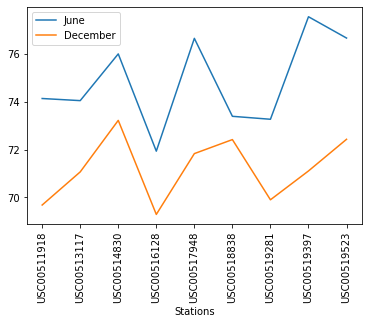

In [51]:
df.plot.line(x='Stations', y=['June', 'December'], rot=90)